# Test 1: Levenshtein Distance

<font size=4px>1. Function to calculate levenshtein distance</font>

In [1]:
def levenshtein(a, b):
    if a==b:
        return 0
    if not a:
        return len(b)
    if not b:
        return len(a)
    # Take the minimum of the following case
    return min(
        levenshtein(a[1:], b[1:]) + (a[0] != b[0]), # Replace first character 
        levenshtein (a[1:], b) + 1, # Remove first character 
        levenshtein(a, b[1:]) + 1 # Insert first character
        )

<font size = 4px>2. Importing pandas data from Excel file</font>

In [9]:
import pandas as pd

df = pd.read_excel("TaskData.xlsx", header=None, names=['Careers'], dtype={'Careers':'object'})
df['Careers']=df['Careers'].str.upper()

valid_careers=['ENGINEER', 'DOCTOR', 'TEACHER', 'DENTIST', 'NURSE', 'LAWYER', 'POLICE', 'ARCHITECT', 'ACCOUNTANT', 'PHARMACIST']

In [10]:
df.head(5)

,Careers
0,COKTER
1,DENTIISTS
2,ENGINIR
3,POLICE
4,ENGNEIEAR


<font size=4px>3. This 'for' loop iterates over the dataset of misspelled careers and compares with the valid careers to find the closest match using the levenshtein distance between each wrong spelling with the valid_career data set. Least levenshtein distance implies closest relation</font>

Here to minimise the execution time, a threshold of value 2 has been set. Whenever the levenshtein distance b/w career column and valid_career is less or equals to 2, this automatically takes the valid_career as expected spelling and stops iterating further for that particular career input.

In [3]:
threshold=2
i=0
for career in df['Careers']:
    mini=99
    for valid_career in valid_careers:
        z = levenshtein(career, valid_career)
        if z<mini:
            mini=z
            expected=valid_career
            if mini<=threshold:
                break

    df.at[i, 'Careers']=expected
    i+=1

In [8]:
df.head(5)

,Careers
0,DOCTOR
1,DENTIST
2,ENGINEER
3,POLICE
4,ENGINEER


In [4]:
df.to_excel("TaskData.xlsx", index=False) # Export the corrected spelling in the Excel file

In [5]:
career_counts = df['Careers'].value_counts()  # Calculate the frequency of each career

<font size=4 px>4. Plot the frequency of each career in a bar chart using mtplotlib</font>

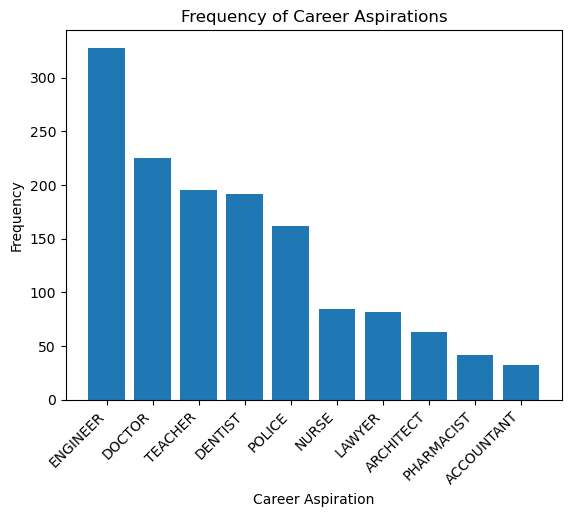

In [6]:
import matplotlib.pyplot as plt
# show(career_counts.index, career_counts.values)

plt.bar(career_counts.index, career_counts.values)  # Plot the bar chart in decreasing order
# Label x & y axis and give a title to the plot
plt.xlabel("Career Aspiration")
plt.ylabel("Frequency")
plt.title("Frequency of Career Aspirations")
plt.xticks(rotation=45, ha='right')  # Rotate x-labels by 45 deg for readability
plt.show()